In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
import plotly
import plotly.graph_objs as go
from sklearn.decomposition import PCA

In [2]:
SP500 = pd.read_csv('SP500_short.csv', index_col='Date')
SP500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 04/01/2016 to 11/09/2017
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JPM UN Equity    426 non-null    float64
 1   USB UN Equity    426 non-null    float64
 2   GS UN Equity     426 non-null    float64
 3   FB UW Equity     426 non-null    float64
 4   AAPL UW Equity   426 non-null    float64
 5   GOOGL UW Equity  426 non-null    float64
 6   GM UN Equity     426 non-null    float64
 7   F UN Equity      426 non-null    float64
dtypes: float64(8)
memory usage: 30.0+ KB


In [3]:
SP500pct_change = SP500.pct_change().dropna()
names = SP500pct_change.columns.values

In [4]:
SP500pct_change.head()

,JPM UN Equity,USB UN Equity,GS UN Equity,FB UW Equity,AAPL UW Equity,GOOGL UW Equity,GM UN Equity,F UN Equity
Date,,,,,,,,
05/01/2016,0.001729,0.004822,-0.017218,0.004989,-0.025059,0.002752,-0.026418,-0.017895
06/01/2016,-0.014436,-0.015115,-0.024413,0.002336,-0.019570,-0.002889,-0.035769,-0.044461
07/01/2016,-0.040439,-0.019001,-0.030735,-0.049043,-0.042205,-0.024140,-0.040934,-0.031274
08/01/2016,-0.022399,-0.014154,-0.004131,-0.006025,0.005288,-0.013617,-0.015338,-0.012598
11/01/2016,-0.001527,0.004030,0.010919,0.001849,0.016192,0.002955,0.024382,0.018341


In [5]:
X = SP500pct_change.values.copy()

In [6]:
n = np.shape(X)[0]; n

425

In [7]:
p = np.shape(X)[1]; p

8

Using PCA for dimensionality reduction

In [8]:
pca = PCA(n_components=p); pca

PCA(n_components=8)

In [9]:
pca.fit(X)

PCA(n_components=8)

In [10]:
pca.explained_variance_

array([7.88835033e-04, 2.82881710e-04, 1.97946391e-04, 1.15643459e-04,
       5.49305488e-05, 4.79961436e-05, 3.46836662e-05, 1.79024815e-05])

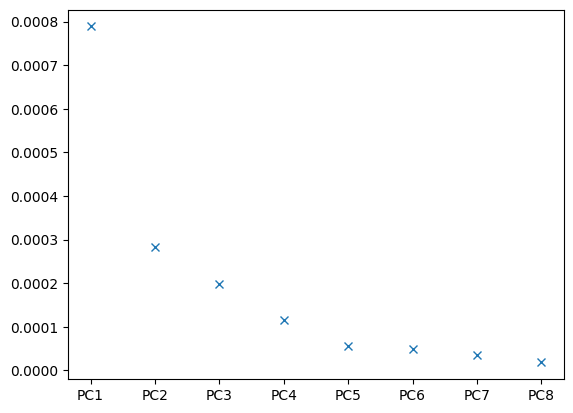

In [11]:
pylab.plot(pca.explained_variance_, 'x')
pylab.xticks(range(p), ['PC' + str(i) for i in range(1, p+1)]);

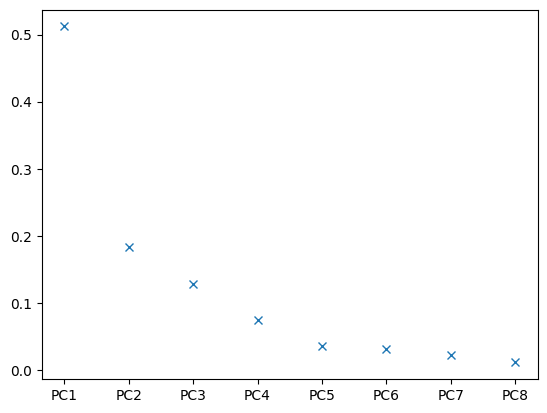

In [12]:
pylab.plot([x / sum(pca.explained_variance_) for x in pca.explained_variance_], 'x')
pylab.xticks(range(p), ['PC' + str(i) for i in range(1, p+1)]);

From this, we see that PC1 explains about 50% of the variance, PC2 nearly 20%, PC3 more than 10%, and so on.

Let us now transform our data to obtain the matrix of principal components. The principal components will be in its columns, while the number of rows will match the number of rows in the original data,

In [13]:
Z = pca.transform(X)

In [14]:
corrmatrix = np.corrcoef(X.T, Z.T)

In [18]:
import plotly.express as px
from plotly.offline import iplot

In [19]:
labels = [x.split()[0] for x in SP500pct_change.columns]
labels.extend(['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)])

trace = go.Heatmap(z=corrmatrix, x=labels, y=labels)
data=[trace]
iplot(data, filename='basic-heatmap')

- In Autoencoder we first encode the input space and then decode it trying to recover the inputs
- In a way we can think of the autoencoder as the NN where the output is same as input, and we are regress input on itself trying to represent the input by lower number of dimensions
- Autoencoder allows to reduce dimensionality using the non-linear transformation as compared to PCA, as we are using the non-linear activation functions

In [20]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import matplotlib.pyplot as plt

In [21]:
input_dim = X.shape[1]
encoding_dim = 1
input_layer = Input(shape=(input_dim,)) #the input layer is of size 8 (number of stocks)
encoded = Dense(encoding_dim, activation='sigmoid')(input_layer) # the encoded layer of the dimensionalty << number of stocks
decoded = Dense(input_dim, activation='sigmoid')(encoded) # the decoded layer of the size == number of stocks
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

None


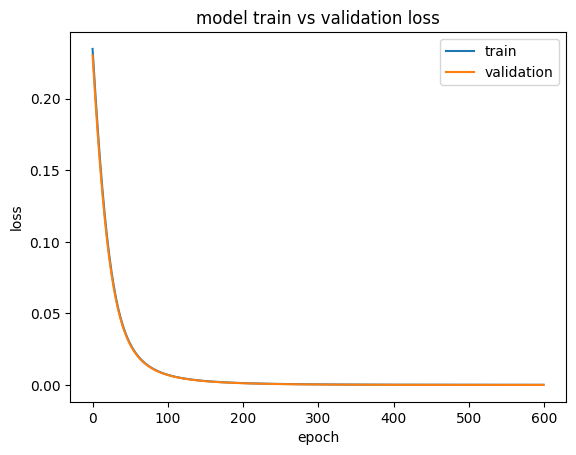

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [22]:
history = autoencoder.fit(X, X,
                epochs=600,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X)

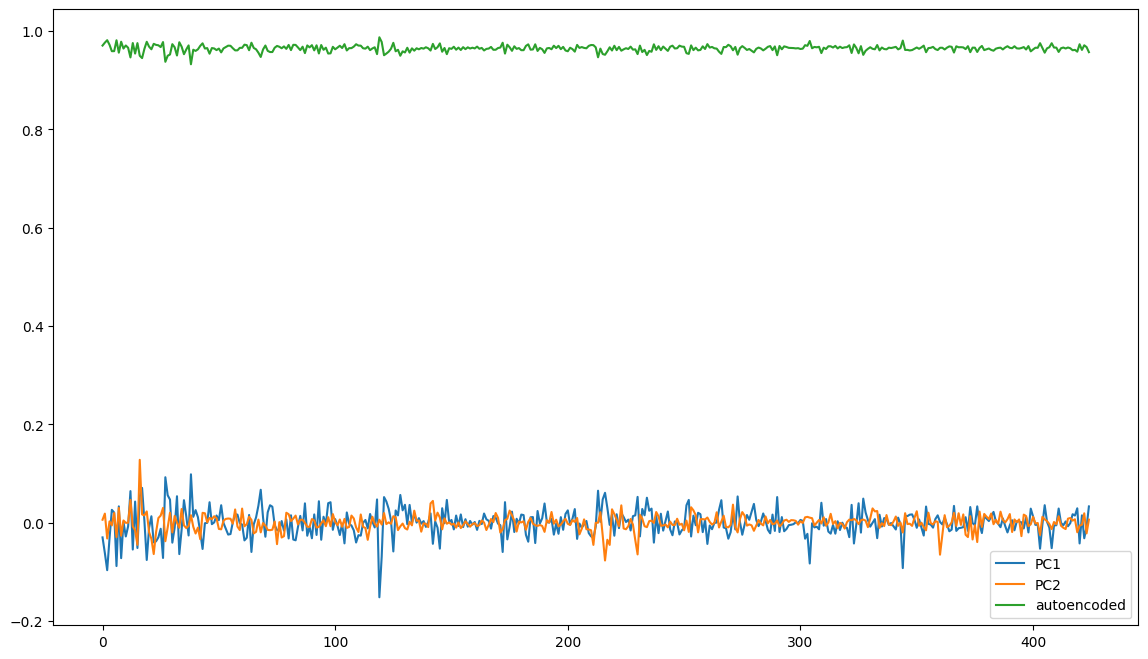

In [23]:
#Plotting the furst three principal components
plt.figure(figsize =(14,8))
plt.plot(Z[:,0], label = 'PC1')
plt.plot(Z[:,1], label = 'PC2')
plt.plot(encoded_data[:,0], label = 'autoencoded')
#plt.plot(encoded_data[:,1], label = 'autoencoded')
plt.legend()

In [25]:
Z_new = np.concatenate((Z, encoded_data),axis =1)
corrmatrix = np.corrcoef(X.T, Z_new.T)

labels = [x.split()[0] for x in SP500pct_change.columns]
labels.extend(['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)])
labels.extend(['Autoencoded' + str(i) for i in range(1, np.shape(encoded_data)[1] + 1)])

trace = go.Heatmap(z=corrmatrix, x=labels, y=labels)
data=[trace]
iplot(data, filename='basic-heatmap')

From above we can see that there is a strong correlation in between the first pricipal component and encoded data of dimension 1, meaning that the encoded data represents the equity index similarly to the 1 principal component

Autoencoder with 2 dimensions encoder

In [26]:
input_dim = X.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim,)) #the input layer is of size 8 (number of stocks)
encoded = Dense(encoding_dim, activation='sigmoid')(input_layer) # the encoded layer of the dimensionalty << number of stocks
decoded = Dense(input_dim, activation='sigmoid')(encoded) # the decoded layer of the size == number of stocks
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

None


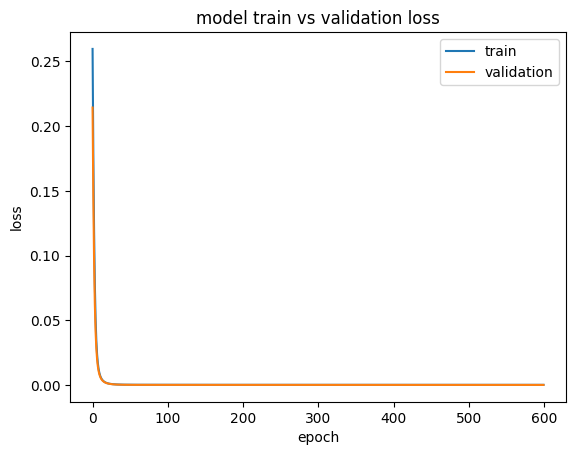

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [27]:
history = autoencoder.fit(X, X,
                epochs=600,
                batch_size=2,
                shuffle=True,
                validation_split=0.05,
                verbose = 0)

#plot our loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X)

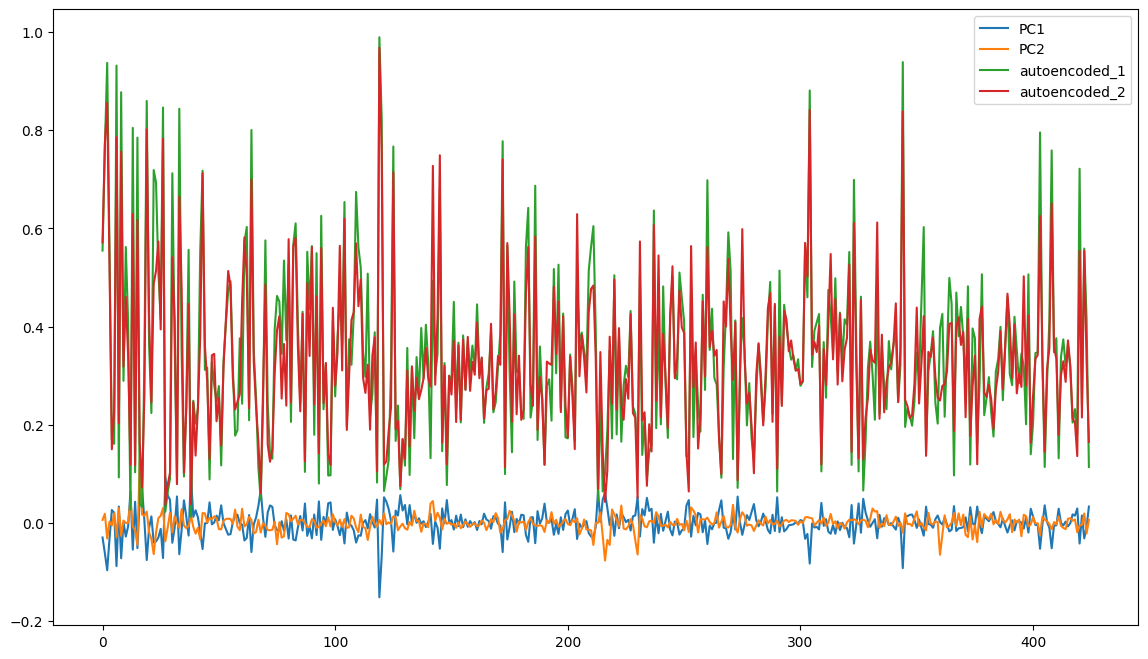

In [28]:
plt.figure(figsize =(14,8))
plt.plot(Z[:,0], label = 'PC1')
plt.plot(Z[:,1], label = 'PC2')
plt.plot(encoded_data[:,0], label = 'autoencoded_1')
plt.plot(encoded_data[:,1], label = 'autoencoded_2')
plt.legend()

In [29]:
Z_new = np.concatenate((Z, encoded_data),axis =1)
corrmatrix = np.corrcoef(X.T, Z_new.T)

labels = [x.split()[0] for x in SP500pct_change.columns]
labels.extend(['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)])
labels.extend(['Autoencoded' + str(i) for i in range(1, np.shape(encoded_data)[1] + 1)])

trace = go.Heatmap(z=corrmatrix, x=labels, y=labels)
data=[trace]
iplot(data, filename='basic-heatmap')